<a href="https://colab.research.google.com/github/FSalteri/IDS_example.py-NEW/blob/main/Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data_url = "https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/pcap_data.csv"
df = pd.read_csv(data_url)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9035
Confusion Matrix:
[[897  59  56]
 [ 59 899  38]
 [ 38  39 909]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1012
         1.0       0.90      0.90      0.90       996
         2.0       0.91      0.92      0.91       986

    accuracy                           0.90      2994
   macro avg       0.90      0.90      0.90      2994
weighted avg       0.90      0.90      0.90      2994



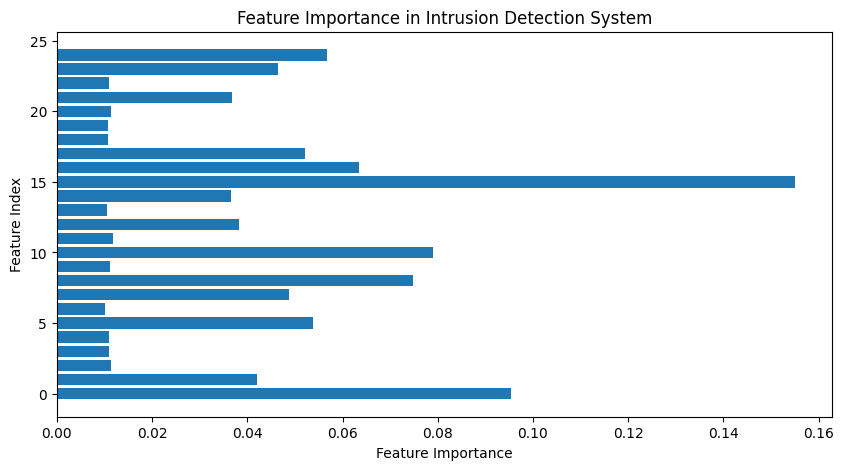

In [ ]:
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(range(len(feature_importance)), feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("Feature Importance in Intrusion Detection System")
plt.show()